<a href="https://colab.research.google.com/github/leenasilvoster/SVM/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# how to import csv from github to google colab

In [3]:
url ="https://raw.githubusercontent.com/leenasilvoster/SVM/main/Algerian_forest_fires_dataset_UPDATE.csv"

In [4]:
df=pd.read_csv(url,encoding='unicode_escape')

In [ ]:
df

In [6]:
df.keys()

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [7]:
df=df.drop(['year'],axis=1)

In [8]:
df.keys()

Index(['day', 'month', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC',
       'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [9]:
df.columns=df.columns.str.strip() # remove white spaces from the column names

In [10]:
df.keys()

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [11]:
set(df.Classes)

{'fire', 'fire ', 'fire   ', 'not fire', 'not fire ', 'not fire   '}

In [12]:
df.Classes=df.Classes.str.strip()

In [13]:
set(df.Classes)

{'fire', 'not fire'}

In [14]:
from sklearn import preprocessing

In [15]:
label_encoder=preprocessing.LabelEncoder()
df['Classes']=label_encoder.fit_transform(df['Classes'])

In [16]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1


In [17]:
set(df.Classes)

{0, 1}

In [18]:
# X will be referred as feature vector
# y will be the label vector

In [19]:
keys=df.keys()

In [20]:
X=df.loc[:,keys[0:-1]]

# From here 'X' is the feature vector

In [21]:
y=df.loc[:,keys[-1]]

# From here 'y' is the label vector

In [22]:
X

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7
118,27,9,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1
119,28,9,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9
120,29,9,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
117    1
118    0
119    1
120    1
121    1
Name: Classes, Length: 122, dtype: int64

In [24]:
X=np.array(X)
y=np.array(y) # we have converted data frames into arrays

In [25]:
X.shape

(122, 12)

In [26]:
y.shape

(122,)

In [27]:
X[0]

array([ 1. ,  6. , 29. , 57. , 18. ,  0. , 65.7,  3.4,  7.6,  1.3,  3.4,
        0.5])

In [28]:
y[0]

1

In [29]:
percentage=df.Classes.value_counts(normalize=True)*100

In [30]:
percentage

1    51.639344
0    48.360656
Name: Classes, dtype: float64

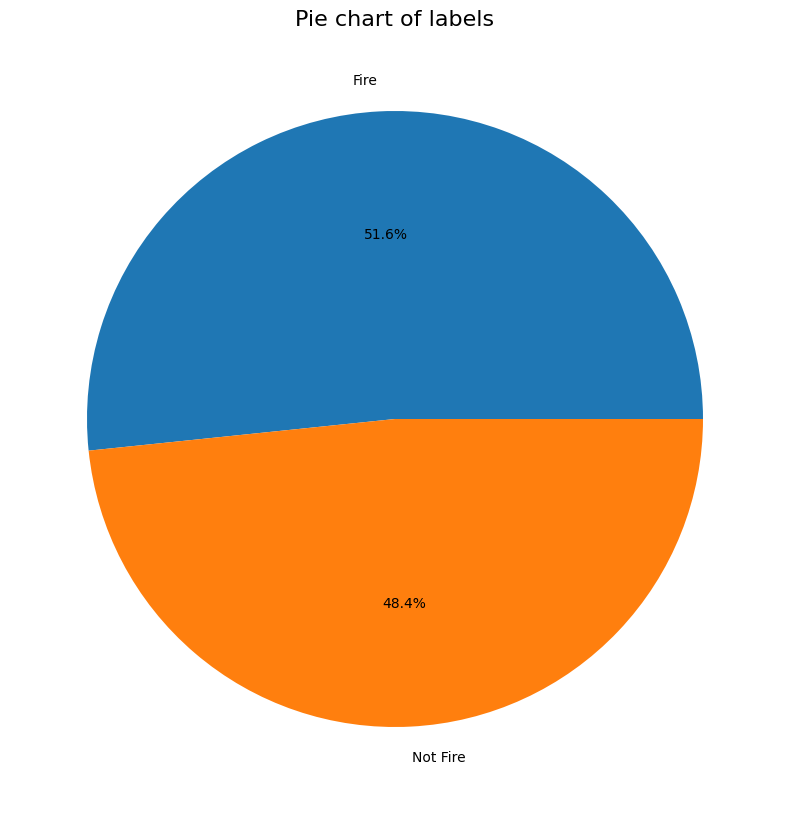

In [31]:
classes_labels=['Fire', 'Not Fire']
plt.figure(figsize=(16,10))
plt.pie(percentage, labels=classes_labels,autopct="%1.1f%%")
plt.title("Pie chart of labels", fontsize=16)
plt.show()

#Training the classifier i.e. SVM


In [49]:
from sklearn.svm import SVC

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
svc=SVC(kernel='linear', degree=3)

In [53]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [54]:
y_pred=svc.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred) # y_test is the actual label, y_pred is the label predicted by the trained classifier here

0.918918918918919

In [56]:
accuracy_score(y_test,y_pred) # poly deg=3

0.918918918918919

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [42]:
# X_train -> X_train_scaled

In [60]:
y_pred=svc.predict(X_test_scaled)

In [61]:
accuracy_score(y_test,y_pred)

0.6486486486486487